The dataset we're going to use can be downloaded from Kaggle. It contains data about credit card transactions that occurred during a period of two days, with 492 frauds out of 284,807 transactions.

All variables in the dataset are numerical. The data has been transformed using PCA transformation(s) due to privacy reasons. The two features that haven't been changed are Time and Amount. Time contains the seconds elapsed between each transaction and the first transaction in the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

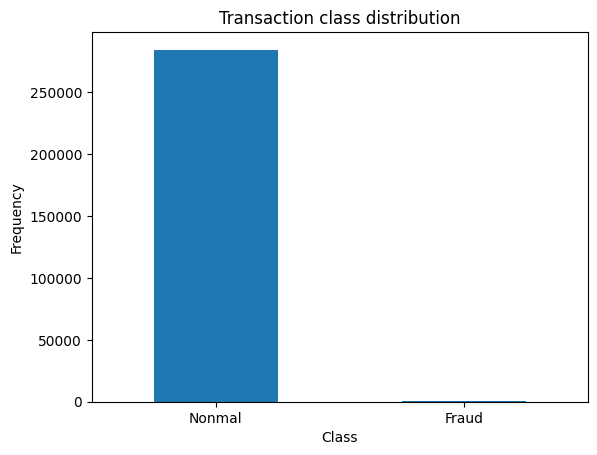

In [ ]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), ['Nonmal', 'Fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency")


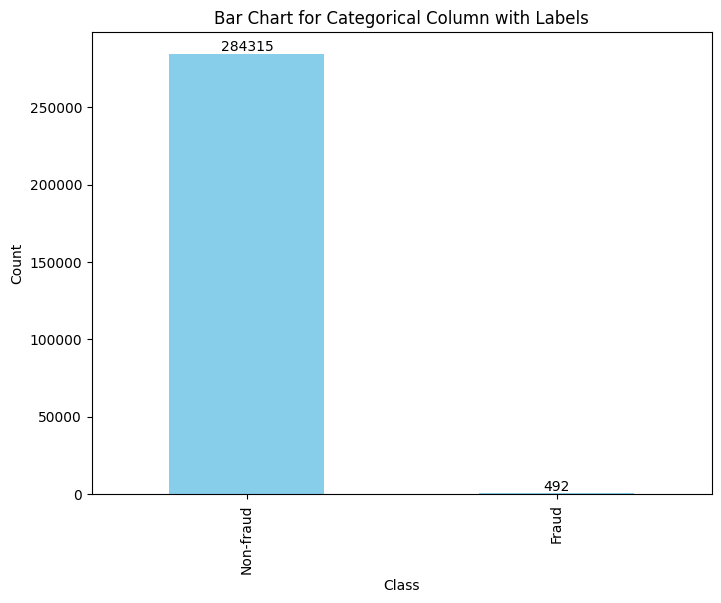

In [ ]:
import matplotlib.pyplot as plt

df['Class'] = df['Class'].replace({'Non-fraud': 0, 'Fraud': 1})

plt.figure(figsize=(8, 6))
counts = df['Class'].value_counts()
counts.plot(kind='bar', color='skyblue')

# Adding labels to the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Bar Chart for Categorical Column with Labels')
plt.xticks([0, 1], ['Non-fraud', 'Fraud'])  # Adjust x-axis tick labels
plt.show()

We have a highly imbalanced dataset on our hands. Normal transactions overwhelm the fraudulent ones by a large margin. Let's look at the two types of transactions:

In [ ]:
fraud_df = df[df.Class == 1]
normal_df = df[df.Class == 0]

In [ ]:
fraud_df.shape,normal_df.shape

((492, 31), (284315, 31))

# **Statistical summary of the 'Amount' column for the fraud transactions:**

In [ ]:
fraud_df.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

# **Statistical summary of the 'Amount' column for the normal transactions:**

In [ ]:
normal_df.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

# **Comparing the distributions between the two classes: fraud and normal transactions:**

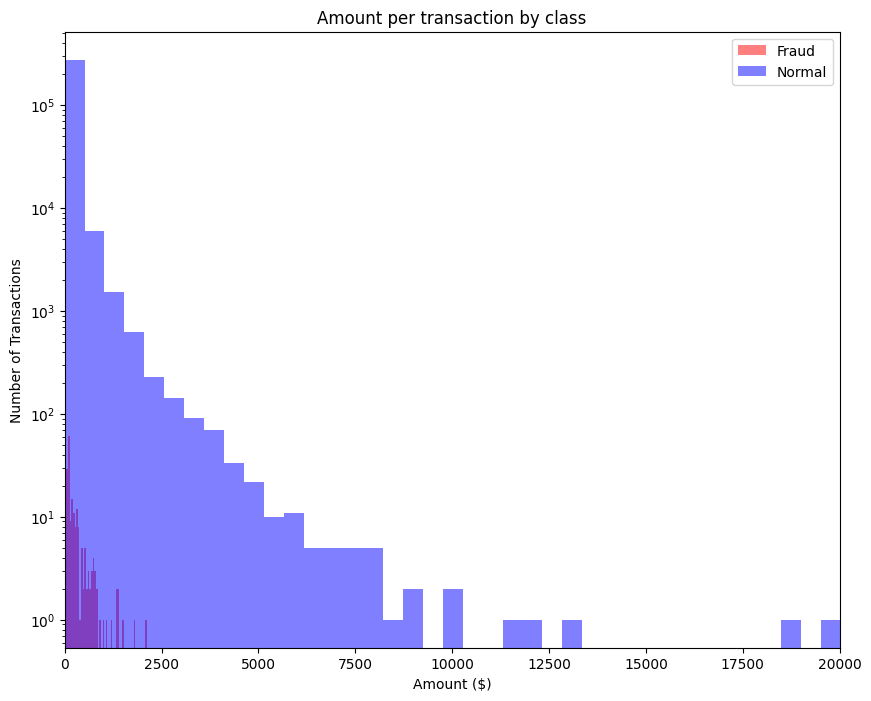

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.hist(fraud_df.Amount, bins=50, color='red', alpha=0.5, label='Fraud')
plt.hist(normal_df.Amount, bins=50, color='blue', alpha=0.5, label='Normal')

plt.title('Amount per transaction by class')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')

plt.legend()
plt.show()

# **Why autoencoder algorithm?**

A) Data Imbalance:

Fraudulent transactions are often rare compared to legitimate transactions, leading to imbalanced datasets where the majority class (legitimate transactions) heavily outweighs the minority class (fraudulent transactions).

Generative AI techniques, such as autoencoders, can help address imbalanced data by generating synthetic fraudulent samples, thereby balancing the dataset and improving the model's ability to detect fraudulent activity.

B) Anomaly Detection:

Autoencoders can be used for anomaly detection, where they learn to reconstruct normal instances accurately and identify instances that deviate significantly during reconstruction as anomalies (potentially fraudulent transactions).

Since fraudulent transactions often exhibit anomalous behavior compared to normal transactions, autoencoders can effectively capture such anomalies without the need for explicit labels.

C) Dimensionality Reduction:

Autoencoders inherently perform dimensionality reduction by learning a compressed representation (latent space) of the input data, minimizing the reconstruction error.

In fraud detection tasks with high-dimensional data, autoencoders can help in capturing essential information for fraud detection while minimizing noise and irrelevant features, leading to improved model performance.

one of the primary objectives of an autoencoder is indeed to reduce the representation error, which is typically measured as the difference between the original input data and the reconstructed output data.

 The process of reducing the representation error involves optimizing the parameters of the autoencoder model, including the weights and biases of the encoder and decoder networks, through a training process. During training, the autoencoder minimizes a reconstruction loss function, such as mean squared error (MSE) or binary cross-entropy, which quantifies the discrepancy between the original input data and the reconstructed output data.

In summary, generative AI approaches with autoencoders can be advantageous for fraudulent activity detection, especially in scenarios with imbalanced datasets, limited labeled data, and the need for unsupervised learning. Autoencoders offer benefits such as data augmentation, anomaly detection, dimensionality reduction, and robustness to adversarial attacks, making them a viable option for fraud detection tasks.

# **Scatter plot:**
  
 It shows the relationship between the time of transaction and the transaction amount for both fraudulent and normal transactions.

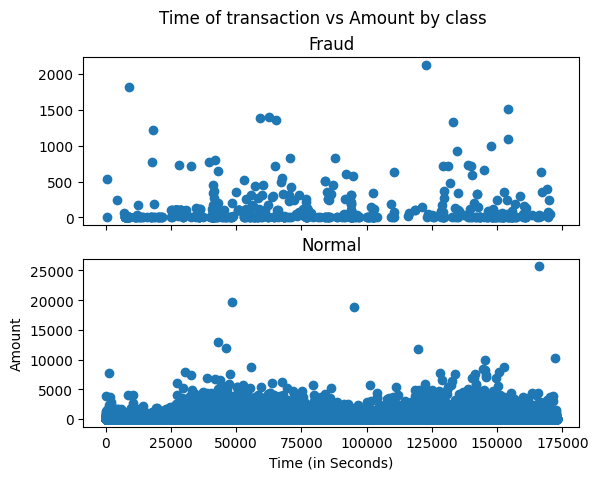

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(fraud_df['Time'], fraud_df['Amount'])
ax1.set_title('Fraud')

ax2.scatter(normal_df['Time'], normal_df['Amount'])
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

 There doesn't seem to be a clear pattern in terms of time of day for either fraud or normal transactions based on the provided plot. However, further analysis may reveal patterns or anomalies in transaction times that could be indicative of fraudulent activity.

# **Data preprocessing for Modeling:**

In [ ]:
from sklearn.preprocessing import StandardScaler

data = df.drop(['Time'], axis=1)

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))


Training our Autoencoder is gonna be a bit different from what we are used to. Let's say you have a dataset containing a lot of non fraudulent transactions at hand. You want to detect any anomaly on new transactions. We will create this situation by training our model on the normal transactions, only. Reserving the correct class on the test set will give us a way to evaluate the performance of our model. We will reserve 40% of our data for validation and testing:

# **Splitting the data into train, validation and test set:**

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting data into train, validation, and test sets
X_train, X_test = train_test_split(data, test_size=0.2, random_state=1)

# Further split training data into train and validation sets
X_train, X_val = train_test_split(X_train, test_size=0.25, random_state=1)  # 0.25 x 0.8 = 0.2

# Preprocessing for training data
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

# Preprocessing for validation data
X_val = X_val[X_val.Class == 0]
X_val = X_val.drop(['Class'], axis=1)


# Preprocessing for test data
y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)


In [ ]:
X_train.shape

(170575, 29)

# **Model Building:**

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn.model_selection import train_test_split


In [ ]:
# Define autoencoder model
input_dim = X_train.shape[1]  # Number of features
encoding_dim = 14  # Choose an encoding dimension

#similar to input layer
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh",
                activity_regularizer=regularizers.l1(10e-5))(input_layer)

encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)

#similar to output layer
decoder = Dense(input_dim, activation='relu')(decoder)#relu gives better accuracy than sigmoid.
#defining the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

There should be X_train for both the input and the target var while trainning the autoencoder model, indicating that the model is trained to reconstruct the input itself.

 **Epoch, Batch_size and Iteration:**

One Epoch = training of the entire dataset (training dataset).

Batch_size = Number of data trained in one batch

One Iteration: training of one batch size

For example, if total number of samples in the dataset=3200, Batch size= 32 and epoch=20.

-->

Iterations in one epoch=3200/32=100

Total iterations in 20 epochs=20 * 100 = 2000

In [ ]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Set up callbacks i.e save/checkpoint the model to callback/load later.
checkpointer = ModelCheckpoint(filepath="model.h5", verbose=0, save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=True)

# Train the model
history = autoencoder.fit(X_train, X_train, epochs=20, batch_size=32, shuffle=True,
                          validation_data=(X_test, X_test), verbose=1,
                          callbacks=[checkpointer, tensorboard])

# Evaluate the model on test data
test_loss = autoencoder.evaluate(X_test, X_test)
print(f"Test Loss: {test_loss}")

Epoch 1/20
5331/5331 [==============================] - 20s 3ms/step - loss: 0.7006 - accuracy: 0.7017 - val_loss: 0.7303 - val_accuracy: 0.6968
Epoch 2/20
  73/5331 [..............................] - ETA: 11s - loss: 0.7843 - accuracy: 0.7132

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5331/5331 [==============================] - 16s 3ms/step - loss: 0.7005 - accuracy: 0.7012 - val_loss: 0.7290 - val_accuracy: 0.6994
Epoch 3/20
5331/5331 [==============================] - 15s 3ms/step - loss: 0.7006 - accuracy: 0.7005 - val_loss: 0.7308 - val_accuracy: 0.7008
Epoch 4/20
5331/5331 [==============================] - 16s 3ms/step - loss: 0.7001 - accuracy: 0.7010 - val_loss: 0.7290 - val_accuracy: 0.7007
Epoch 5/20
5331/5331 [==============================] - 18s 3ms/step - loss: 0.6997 - accuracy: 0.7022 - val_loss: 0.7286 - val_accuracy: 0.6984
Epoch 6/20
5331/5331 [==============================] - 20s 4ms/step - loss: 0.7000 - accuracy: 0.7022 - val_loss: 0.7312 - val_accuracy: 0.7000
Epoch 7/20
5331/5331 [==============================] - 15s 3ms/step - loss: 0.6997 - accuracy: 0.7037 - val_loss: 0.7314 - val_accuracy: 0.6928
Epoch 8/20
5331/5331 [==============================] - 16s 3ms/step - loss: 0.6997 - accuracy: 0.7036 - val_loss: 0.7279 - val_accuracy: 0.6

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5331/5331 [==============================] - 16s 3ms/step - loss: 0.6992 - accuracy: 0.7035 - val_loss: 0.7299 - val_accuracy: 0.6982
Epoch 10/20
5331/5331 [==============================] - 16s 3ms/step - loss: 0.6990 - accuracy: 0.7037 - val_loss: 0.7271 - val_accuracy: 0.7046
Epoch 11/20
5331/5331 [==============================] - 19s 4ms/step - loss: 0.6991 - accuracy: 0.7043 - val_loss: 0.7279 - val_accuracy: 0.7001
Epoch 12/20
5331/5331 [==============================] - 15s 3ms/step - loss: 0.6991 - accuracy: 0.7039 - val_loss: 0.7304 - val_accuracy: 0.6960
Epoch 13/20
5331/5331 [==============================] - 16s 3ms/step - loss: 0.6992 - accuracy: 0.7045 - val_loss: 0.7272 - val_accuracy: 0.7037
Epoch 14/20
5331/5331 [==============================] - 16s 3ms/step - loss: 0.6989 - accuracy: 0.7035 - val_loss: 0.7269 - val_accuracy: 0.7049
Epoch 15/20
5331/5331 [==============================] - 16s 3ms/step - loss: 0.6986 - accuracy: 0.7048 - val_loss: 0.7277 - val_accurac

TensorBoard callback in TensorFlow is used to log training metrics and visualize them using TensorBoard:

# **Training metrics:**

Loss: The loss function measures how well the model's predictions match the true labels in the training data. It quantifies the difference between the predicted values and the actual values. Lower loss values indicate better performance.

Accuracy: Accuracy measures the proportion of correctly classified samples in the training dataset. It is calculated as the number of correct predictions divided by the total number of predictions. Higher accuracy values indicate better performance.

Precision: Precision measures the proportion of true positive predictions among all positive predictions made by the model. It is calculated as the number of true positives divided by the sum of true positives and false positives. Higher precision values indicate fewer false positive predictions.

Recall: Recall measures the proportion of true positive predictions among all actual positive samples in the dataset. It is calculated as the number of true positives divided by the sum of true positives and false negatives. Higher recall values indicate fewer false negative predictions.

F1 Score: The F1 score is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall. Higher F1 scores indicate better overall performance.

# **Visualization of Evaluation of training and validation loss:**

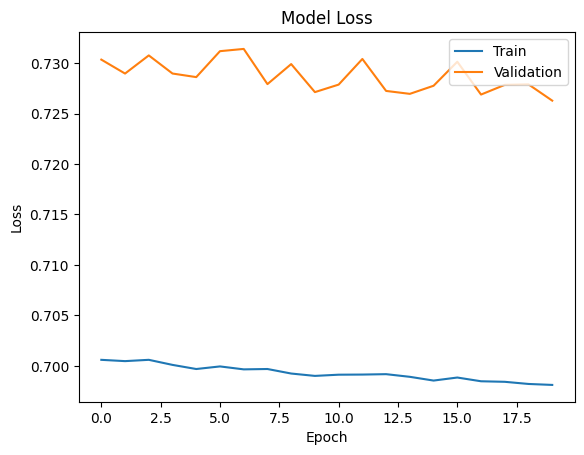

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

The reconstruction error on our training and test data seems to converge nicely. Is it low enough? Let's have a closer look at the error distribution:

In [ ]:
from tensorflow.keras.models import load_model
autoencoder = load_model('model.h5')

In [ ]:
predictions = autoencoder.predict(X_test)
print(predictions)

1781/1781 [==============================] - 2s 1ms/step
[[0.         0.08730467 0.         ... 0.         0.         0.        ]
 [0.         1.3120126  1.510833   ... 0.         0.         0.        ]
 [0.         1.1483979  0.25653553 ... 0.         0.         0.        ]
 ...
 [0.         0.12495641 1.2875975  ... 0.         0.         0.        ]
 [0.9333725  0.         0.94149065 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [ ]:
error_df.describe()

,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.725435,0.001527
std,3.453291,0.039052
min,0.038450,0.000000
25%,0.233936,0.000000
50%,0.381978,0.000000
75%,0.624886,0.000000
max,382.712990,1.000000


# **Reconstruction error without fraud:**

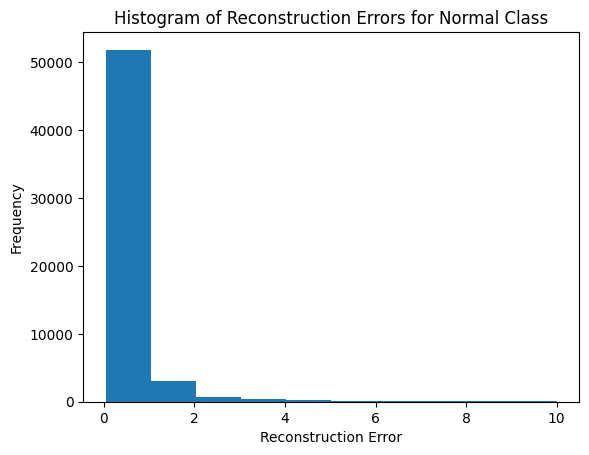

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

# Filter out the normal class with reconstruction errors less than 10
normal_error_df = error_df[(error_df['true_class'] == 0) & (error_df['reconstruction_error'] < 10)]

# Plot histogram
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

# Add labels and title
ax.set_xlabel('Reconstruction Error')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Reconstruction Errors for Normal Class')

plt.show()


The above graph shows the distribution of reconstruction errors for normal instances and gain insights into how well the autoencoder model is reconstructing normal data. Lower reconstruction errors indicate better performance of the autoencoder in reconstructing normal instances, while higher errors may indicate anomalies or instances where the model struggles to reconstruct accurately.

# **Reconstruction error with fraud:**

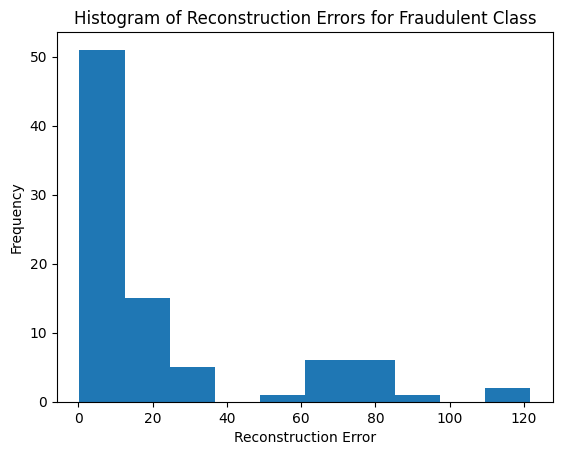

In [ ]:
import matplotlib.pyplot as plt

# Create a new figure and subplot
fig = plt.figure()
ax = fig.add_subplot(111)

# Filter out the fraudulent class from the error DataFrame
fraud_error_df = error_df[error_df['true_class'] == 1]

# Plot the histogram
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

# Set labels for x-axis and y-axis
ax.set_xlabel('Reconstruction Error')
ax.set_ylabel('Frequency')

# Set title
ax.set_title('Histogram of Reconstruction Errors for Fraudulent Class')

# Show the plot
plt.show()


# **Evaluation of the performance of autoencoder classification models:**

In [ ]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

Our data being Imbalanced Data, let's see the ROC curve.

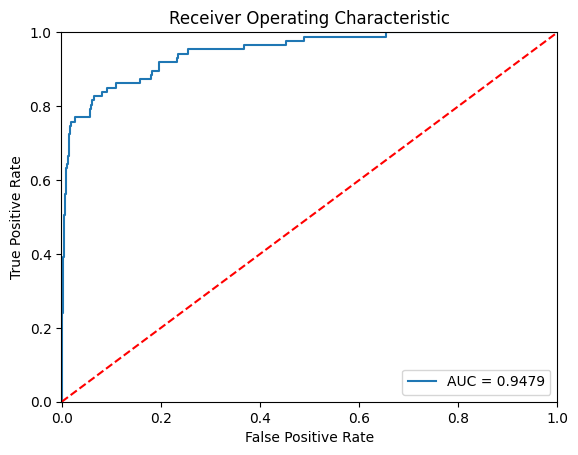

In [ ]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();
# red diagonal=ROC curve is random guessing or no-discrimination, AUC=0.5, equal fpr and tpr

The red dashed line in the Receiver Operating Characteristic (ROC) curve is random guessing,False Positive = True Positve.

When evaluating a fraud detection model, we aim to minimize false positives (FP=falsly predicting fradulent transaction) while maximizing true positives (TP).


In our case, the AOC curve residing at the top-left corner and the farther away from the red dashed line indicates the better the performance of the autoencoder classification model.

# **Precision vs Recall:**

Precision and recall are two commonly used metrics in binary classification tasks. They are calculated based on the numbers of true positives (TP), false positives (FP), and false negatives (FN) as follows:
Precision=tp / (tp + fp)=accuracy of positive predictions=tp/total p predictions

Recall (R), also known as sensitivity or true positive rate (TPR), is the ratio of true positives to the total number of actual positives (both true positives and false negatives):
Recall=tp / (tp + fn)=completeness of positive predictions=tp/total actual positives

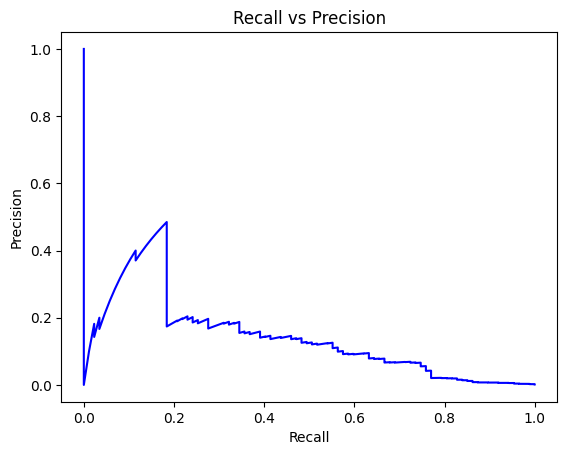

In [ ]:
precision, recall, threshold = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

A higher precision indicates fewer false positives (normal transactions incorrectly classified as fraudulent), while a lower precision means more false positives.
precision = tp / (tp + fp)
A higher recall indicates that more actual fraudulent transactions are correctly identified as fraudulent, while a lower recall means that some fraudulent transactions are missed (false negatives).

recall = tp / (tp + fn)
The goal is to achieve a high precision and high recall simultaneously, indicating accurate and comprehensive detection of fraudulent transactions.

Interpretation:

A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

Higher Precision: High precision means that when the model flags a transaction as fraudulent, it is highly likely to be correct. In other words, the proportion of true fraud cases among the flagged transactions is high. Higher precision helps in minimizing false positives, which are normal transactions incorrectly classified as fraud. This is important because false positives can lead to inconvenience for customers and unnecessary investigations.

Higher Recall: High recall means that the model is effective at identifying most of the actual fraud cases present in the dataset. In other words, it captures a larger proportion of the true fraud cases. Higher recall helps in minimizing false negatives, which are actual fraud cases that are missed by the model. Missing fraud cases can lead to financial losses and damage to the reputation of the organization.

# **Precision against different Threshold values:**

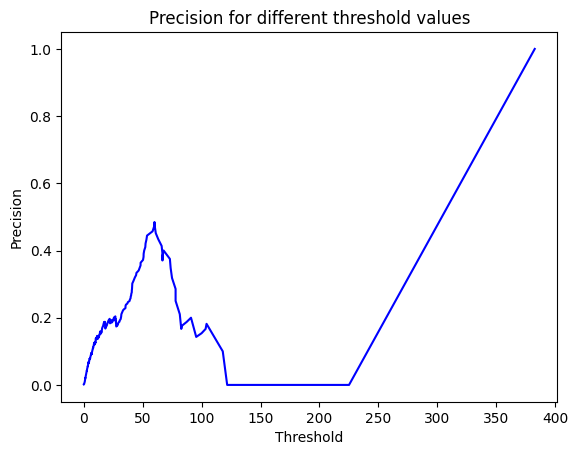

In [ ]:
plt.plot(threshold, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

Precision increses when threshold increses.

# **Recall against different Threshold values:**

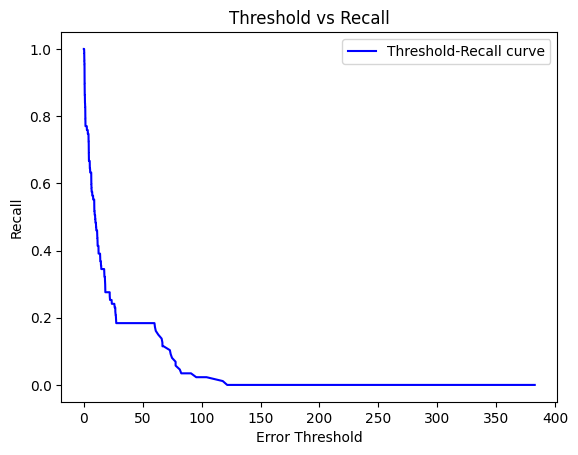

In [ ]:
plt.plot(threshold, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Threshold vs Recall')
plt.xlabel('Error Threshold')
plt.ylabel('Recall')
plt.legend(loc='upper right')
plt.show()


Recall and threshold has inverse relation.

Higher Precision: A high precision implies that when the model identifies a transaction as fraudulent, it is highly likely to be correct. This means that the majority of transactions flagged as fraudulent are indeed fraudulent, minimizing false accusations against legitimate customers.

Higher Recall: A high recall indicates that the model effectively captures most of the actual fraudulent transactions. This ensures that a large proportion of fraudulent activities are detected, reducing financial losses and maintaining trust in the system.

# **Checking Recunstruction Error:**

In [ ]:
threshold_value = 2.9

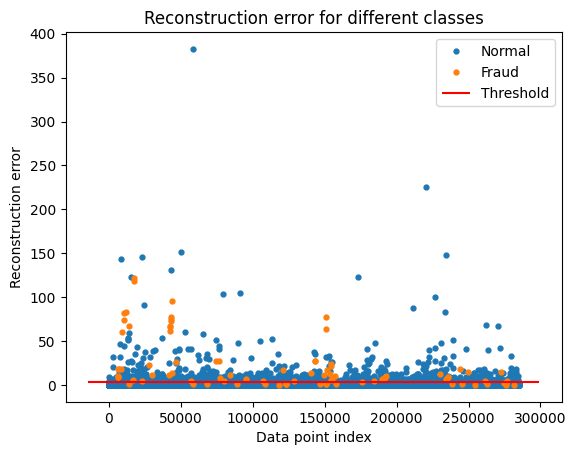

In [ ]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_value, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

We still have few fraud transactions above the threshold, lets check the confusion matrix

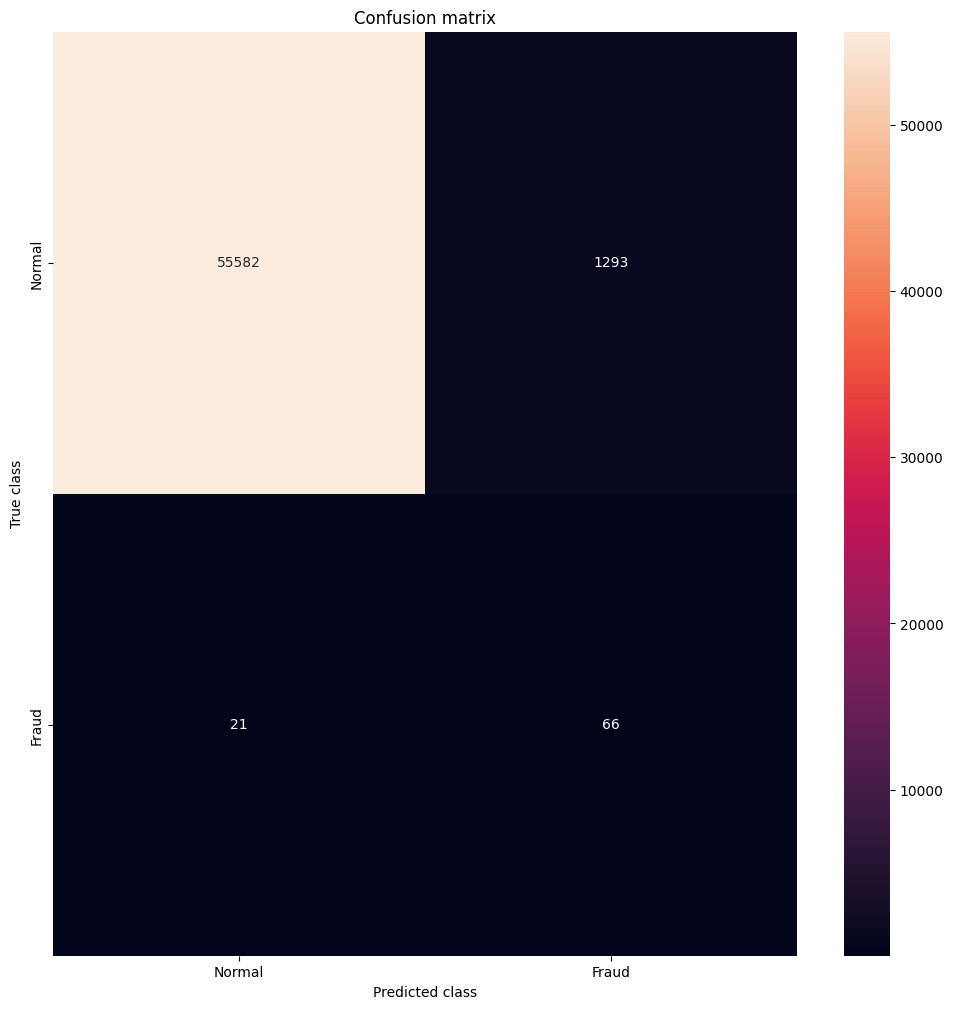

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate predicted classes based on reconstruction error and threshold
y_pred = [1 if e > threshold_value else 0 for e in error_df.reconstruction_error.values]

# Compute confusion matrix
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

# Define class labels
LABELS = ["Normal", "Fraud"]

# Plot confusion matrix
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()